<a href="https://colab.research.google.com/github/Dupskops/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes-Anibal-/blob/main/Challenge_Telecom_X_an%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHALLENGE

Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

In [9]:
pd.set_option('display.max_columns', None)

# Extraccion de los datos

In [10]:
import pandas as pd

In [11]:
ruta = '/content/TelecomX_Data.json'
datos = pd.read_json(ruta)

In [12]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [13]:
datos.shape

(7267, 6)

# Transformacion de los datos

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [15]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [16]:
df_customer = pd.json_normalize(datos['customer'])


In [17]:
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [18]:
df_phone= pd.json_normalize(datos['phone'])

In [19]:
df_internet = pd.json_normalize(datos['internet'])

In [20]:
df_account =pd.json_normalize(datos['account'])

In [21]:
# Unir con el conjunto original
datos = pd.concat(
    [
        datos.drop(['customer', 'phone', 'internet', 'account'], axis=1),
        df_customer,
        df_phone,
        df_internet,
        df_account
    ],
    axis=1
)



In [22]:
datos.shape

(7267, 21)

In [23]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [24]:
# Hay valores vacios
pd.unique(datos['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [25]:
# Se confirma la existencia de los nulos
datos[datos['Churn'].str.strip() == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [26]:
# Reemplazo por nan para eliminar
import numpy as np

datos['Churn'] = datos['Churn'].replace('', np.nan)

In [27]:
# Verifico
datos['Churn'].isna().sum()

np.int64(224)

In [28]:
# Elimino
datos = datos.dropna(subset=['Churn'])

In [29]:
pd.unique(datos['Churn'])

array(['No', 'Yes'], dtype=object)

In [30]:
pd.unique(datos['Charges.Total'])

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [32]:
# Cambio de tipo en caso de encontrar nulos los colocara nan
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')


In [33]:
# Se encontraron valores vacios
datos['Charges.Total'].isna().sum()


np.int64(11)

In [34]:
# Esto es porque no tienen ni un mes de contratos y la carga es baja
datos[datos['Charges.Total'].isna()][['tenure', 'Charges.Monthly','Charges.Total']]



,tenure,Charges.Monthly,Charges.Total
975,0,56.05,NaN
1775,0,20.00,NaN
1955,0,61.90,NaN
2075,0,19.70,NaN
2232,0,20.25,NaN
2308,0,25.35,NaN
2930,0,73.35,NaN
3134,0,25.75,NaN
3203,0,52.55,NaN
4169,0,80.85,NaN


In [35]:
# Cambio el NaN por 0
datos.loc[datos['Charges.Total'].isna(), 'Charges.Total'] = 0


In [36]:
# ya no hay NaN
datos['Charges.Total'].isna().sum()


np.int64(0)

In [37]:
datos[datos['Charges.Total'] == 0]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [38]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [39]:
# Creando la columna cuentas diarias
datos['Cuentas_Diarias'] = datos['Charges.Monthly'] / 30
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [40]:
datos[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [41]:
datos['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [42]:
# Para las decimales
datos['Cuentas_Diarias'] = datos['Cuentas_Diarias'].round(2)


In [43]:
datos[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [44]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [45]:
# Crear el mismo data frame para el analsis y mantener la intergridad de los datos
columnas_analisis = [
    'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
    'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
    'Cuentas_Diarias'
]

df_analisis = datos[columnas_analisis].copy()


In [46]:
df_analisis.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


# Carga y analisis

## Analisis Descriptivo


Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los cliente

In [47]:
# En general
df_analisis.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158675
std,0.368612,24.559481,30.090047,2266.794470,1.003088
min,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,9.000000,35.500000,398.550000,1.180000
50%,0.000000,29.000000,70.350000,1394.550000,2.340000
75%,0.000000,55.000000,89.850000,3786.600000,2.990000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [48]:
# Por clientes con churn
df_analisis.groupby('Churn')[[
    'tenure',
    'Charges.Monthly',
    'Charges.Total',
    'Cuentas_Diarias'
]].describe()



tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      Charges.Monthly                                                    \
                count       mean        std    min    25%     50%   75%   
Churn                                                                     
No             5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   
Yes            1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   

              Charges.Total                                                    \
          max         count         mean          std    min    25%       50%   
Churn                                                                           
No     118.75        5174.0  2549.911442  2329.954215   0.00  572.9  1679.525   
Yes    118.35        1869.0  1531.796094  1890.822994  18.85  134.5   703.550   

                        Cuentas_Diarias                                       \
           75%      max           count     mean       std   min   25%   50%   
Churn                                                                          
No     4262.85  8672.45          5174.0  2.04208  1.036492  0.61  0.84  2.15   
Yes    2331.30  8684.80          1869.0  2.48145  0.822287  0.63  1.87  2.66   

                   
        75%   max  
Churn              
No     2.95  3.96  
Yes    3.14  3.94

## Distribucion de evasion

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

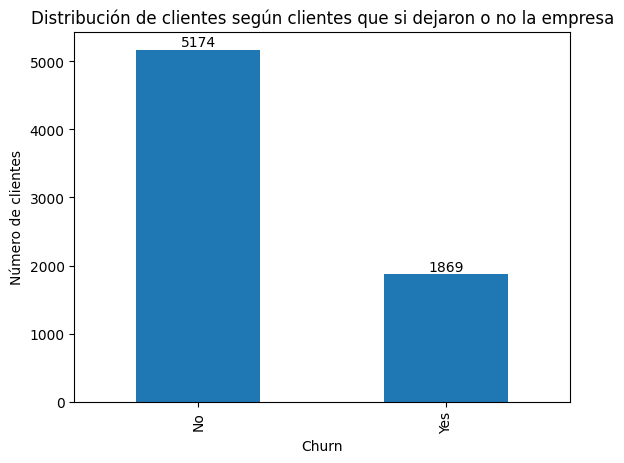

In [49]:
# Por clientes que dejaron la empresa o se quedaron
import matplotlib.pyplot as plt

conteo_churn = df_analisis['Churn'].value_counts()

plt.figure()
ax = conteo_churn.plot(kind='bar')

plt.title('Distribución de clientes según clientes que si dejaron o no la empresa')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')

# Agregar etiquetas con el valor encima de cada barra
for i, valor in enumerate(conteo_churn):
    ax.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()



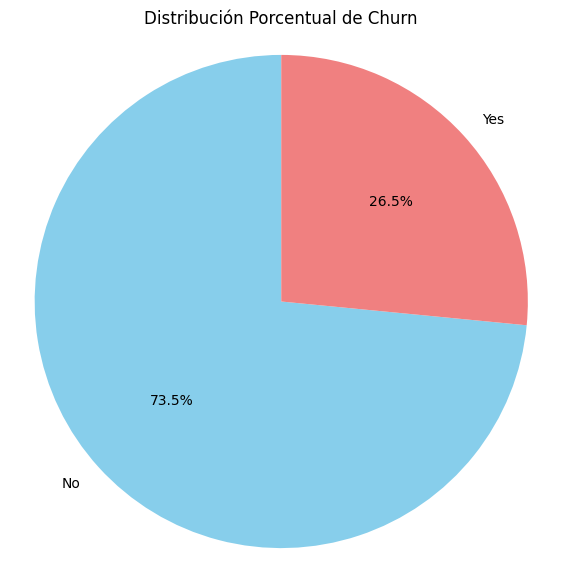

In [51]:
# Calcular el porcentaje de Churn
porcentaje_churn = conteo_churn / conteo_churn.sum() * 100

# Crear el gráfico de pastel
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.pie(
    porcentaje_churn,
    labels=porcentaje_churn.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'] # Añadir colores para mejor distinción
)
plt.title('Distribución Porcentual de Churn')
plt.axis('equal') # Asegura que el pastel sea un círculo.
plt.show()

## Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [52]:
# Creamos una funcion para generar graficos segun variable categorica y el churn
def grafico_churn_categorico(df, columna):
    tabla = pd.crosstab(df[columna], df['Churn'], normalize='index') * 100

    plt.figure()
    tabla.plot(kind='bar')
    plt.title(f'Churn (%) según {columna}')
    plt.xlabel(columna)
    plt.ylabel('Porcentaje')
    plt.legend(title='Churn')
    plt.show()

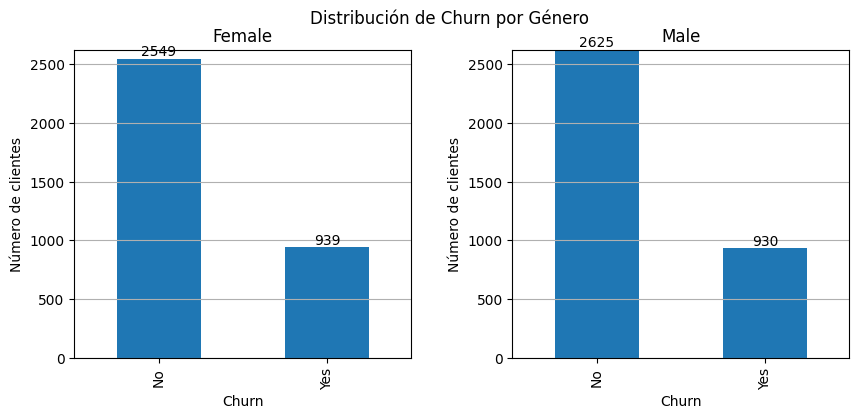

In [53]:
# Tabla de conteo
conteo_genero_churn = pd.crosstab(df_analisis['gender'], df_analisis['Churn'])

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.3)
fig.suptitle('Distribución de Churn por Género')

# Female
conteo_genero_churn.loc['Female'].plot(
    kind='bar',
    ax=axs[0]
)
axs[0].set_title('Female')
axs[0].set_xlabel('Churn')
axs[0].set_ylabel('Número de clientes')

# Etiquetas en barras (Female)
for i, valor in enumerate(conteo_genero_churn.loc['Female']):
    axs[0].text(i, valor, str(valor), ha='center', va='bottom')

# Male
conteo_genero_churn.loc['Male'].plot(
    kind='bar',
    ax=axs[1]
)
axs[1].set_title('Male')
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Número de clientes')

# Etiquetas en barras (Male)
for i, valor in enumerate(conteo_genero_churn.loc['Male']):
    axs[1].text(i, valor, str(valor), ha='center', va='bottom')

# Unificar escala Y
ymin = 0
ymax = conteo_genero_churn.values.max()

for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)
    ax.grid(axis='y')

plt.show()


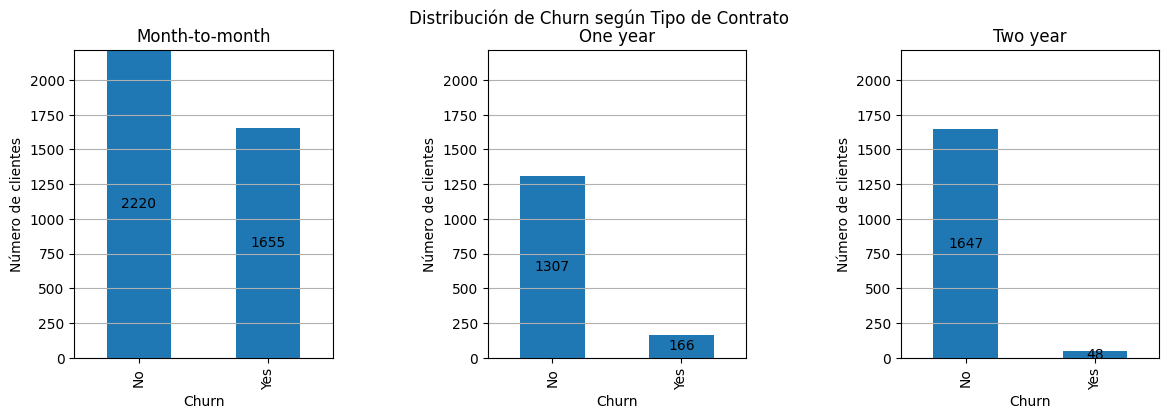

In [62]:
# Tipo de contrato
conteo_contract_churn = pd.crosstab(df_analisis['Contract'], df_analisis['Churn'])

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
fig.subplots_adjust(wspace=0.6)
fig.suptitle('Distribución de Churn según Tipo de Contrato')

ymax = conteo_contract_churn.values.max()

for i, contract in enumerate(conteo_contract_churn.index):
    conteo_contract_churn.loc[contract].plot(
        kind='bar',
        ax=axs[i]
    )
    axs[i].set_title(contract)
    axs[i].set_xlabel('Churn')
    axs[i].set_ylabel('Número de clientes')
    axs[i].set_ylim(0, ymax)
    axs[i].grid(axis='y')

    # Etiquetas dentro de las barras
    for j, valor in enumerate(conteo_contract_churn.loc[contract]):
        axs[i].text(
            j,
            valor * 0.5,
            str(valor),
            ha='center',
            va='center'
        )

plt.show()


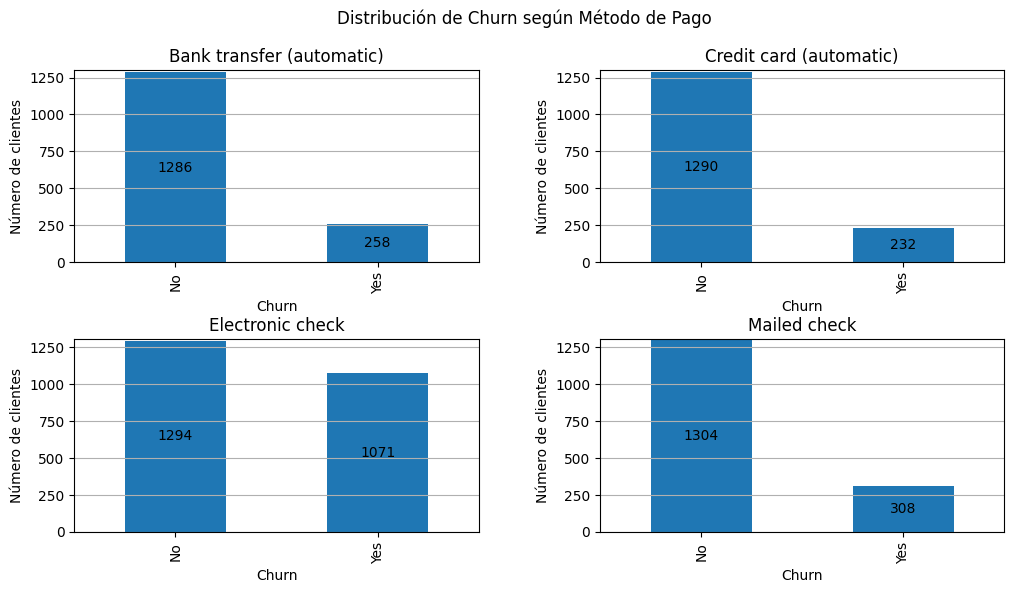

In [58]:
# Metodo de pago
conteo_payment_churn = pd.crosstab(df_analisis['PaymentMethod'], df_analisis['Churn'])

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Distribución de Churn según Método de Pago')

axs = axs.ravel()
ymax = conteo_payment_churn.values.max()

for i, method in enumerate(conteo_payment_churn.index):
    conteo_payment_churn.loc[method].plot(
        kind='bar',
        ax=axs[i]
    )
    axs[i].set_title(method)
    axs[i].set_xlabel('Churn')
    axs[i].set_ylabel('Número de clientes')
    axs[i].set_ylim(0, ymax)
    axs[i].grid(axis='y')

    for j, valor in enumerate(conteo_payment_churn.loc[method]):
        axs[i].text(
            j,
            valor * 0.5,
            str(valor),
            ha='center',
            va='center'
        )

plt.show()



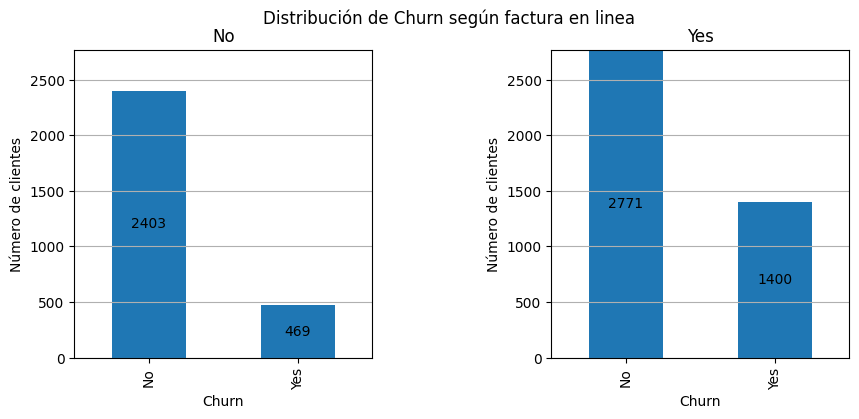

In [61]:
# Clientes que reciben factura en linea
conteo_paperless_churn = pd.crosstab(df_analisis['PaperlessBilling'], df_analisis['Churn'])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.6)
fig.suptitle('Distribución de Churn según factura en linea')

ymax = conteo_paperless_churn.values.max()

for i, option in enumerate(conteo_paperless_churn.index):
    conteo_paperless_churn.loc[option].plot(
        kind='bar',
        ax=axs[i]
    )
    axs[i].set_title(option)
    axs[i].set_xlabel('Churn')
    axs[i].set_ylabel('Número de clientes')
    axs[i].set_ylim(0, ymax)
    axs[i].grid(axis='y')

    for j, valor in enumerate(conteo_paperless_churn.loc[option]):
        axs[i].text(
            j,
            valor * 0.5,
            str(valor),
            ha='center',
            va='center'
        )

plt.show()


## Conteo de evasion por variables numericas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

<Figure size 640x480 with 0 Axes>

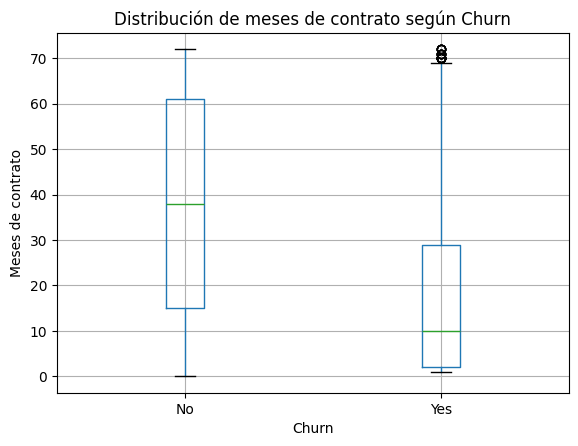

In [68]:
# Meses de contrato
plt.figure()
df_analisis.boxplot(column='tenure', by='Churn')
plt.title('Distribución de meses de contrato según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Meses de contrato')
plt.show()

<Figure size 640x480 with 0 Axes>

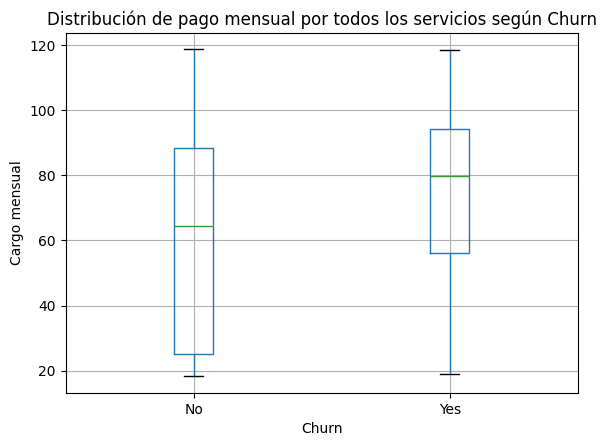

In [79]:
# Total de pago de servicios totales por mes
plt.figure()
df_analisis.boxplot(column='Charges.Monthly', by='Churn')
plt.title('Distribución de pago mensual por todos los servicios según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cargo mensual')
plt.show()


<Figure size 640x480 with 0 Axes>

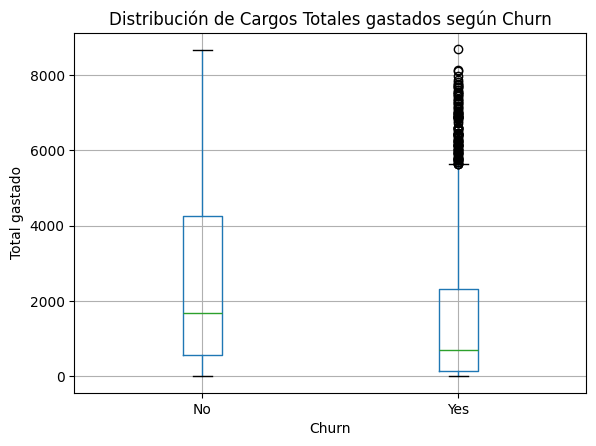

In [80]:
# Total gastado de los clientes
plt.figure()
df_analisis.boxplot(column='Charges.Total', by='Churn')
plt.title('Distribución de Cargos Totales gastados según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Total gastado')
plt.show()


<Figure size 640x480 with 0 Axes>

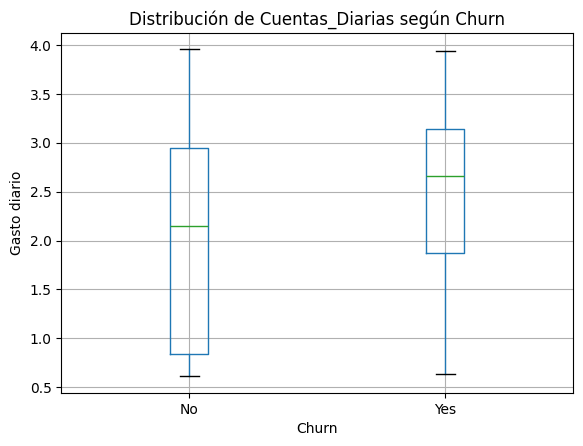

In [81]:
# Costo diario de los clientes
plt.figure()
df_analisis.boxplot(column='Cuentas_Diarias', by='Churn')
plt.title('Distribución de Cuentas_Diarias según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Gasto diario')
plt.show()


In [82]:
df_analisis['tenure_rango'] = pd.cut(
    df_analisis['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-12', '13-24', '25-48', '49-72']
)

pd.crosstab(
    df_analisis['tenure_rango'],
    df_analisis['Churn'],
    normalize='index'
) * 100


Churn,No,Yes
tenure_rango,,
0-12,52.321839,47.678161
13-24,71.289062,28.710938
25-48,79.611041,20.388959
49-72,90.486824,9.513176


# Informe Final

# Introducción
Telecom X enfrenta una problemática relevante de evasión de clientes (Churn), lo cual impacta negativamente en la estabilidad de ingresos y en la relación a largo plazo con sus usuarios. La evasión ocurre cuando un cliente decide cancelar el servicio, y comprender los factores que influyen en esta decisión es clave para diseñar estrategias efectivas de retención.

El objetivo de este análisis es explorar y comprender los patrones asociados al churn, utilizando técnicas de análisis exploratorio de datos (EDA) en Python. A partir del análisis de variables demográficas, contractuales y de consumo, se busca identificar comportamientos recurrentes que ayuden a explicar por qué ciertos clientes abandonan el servicio.

# Limpieza y Tratamiento de Datos

El análisis comenzó con la extracción de datos desde una API en formato JSON, la cual contenía información estructurada y anidada. Para facilitar el análisis:
<ul>
<li>
Se normalizaron las estructuras anidadas utilizando pd.json_normalize, consolidando la información en un solo DataFrame.
</li>
<li>
Se revisó la estructura general del dataset (shape, info) para verificar el número de registros, columnas y tipos de datos.
</li>
<li>
Se identificó que la columna Charges.Total se encontraba en formato object, por lo que fue convertida a tipo numérico usando pd.to_numeric(errors='coerce').
</li>
<li>
Se detectaron 11 valores nulos en Charges.Total, correspondientes a clientes con muy poco tiempo de contrato. Estos valores fueron imputados con 0, ya que lógicamente no han generado gasto acumulado.
</li>
<li>
Se validaron los valores de la variable objetivo Churn, asegurando su correcta interpretación.
</li>
<li>
Finalmente, se creó la variable Cuentas_Diarias, calculada a partir del cargo mensual, con el fin de analizar el costo percibido diario por cliente.
</li>
</ul>


Estos pasos garantizaron un dataset limpio, consistente y listo para el análisis exploratorio.

# Análisis Exploratorio de Datos (EDA)

## Análisis general de la evasión
El análisis inicial mostró que, si bien la mayoría de los clientes permanece en la empresa, existe una proporción significativa que cancela el servicio, confirmando la relevancia del problema de churn.


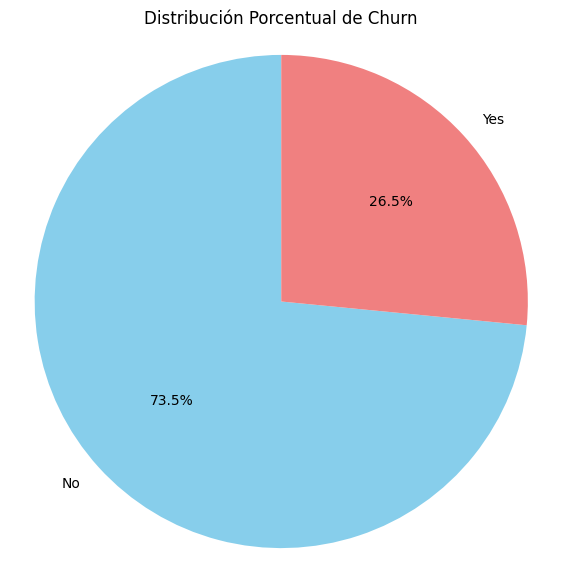

In [83]:
porcentaje_churn = conteo_churn / conteo_churn.sum() * 100

# Crear el gráfico de pastel
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.pie(
    porcentaje_churn,
    labels=porcentaje_churn.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'] # Añadir colores para mejor distinción
)
plt.title('Distribución Porcentual de Churn')
plt.axis('equal') # Asegura que el pastel sea un círculo.
plt.show()

## Variables categóricas

Se analizaron variables como género, tipo de contrato, método de pago, facturación electrónica y servicios online mediante gráficos de barras y subplots comparativos.

Los principales patrones observados fueron:
<ul>
<li>
El género no presenta diferencias significativas en la evasión de clientes.
</li>
</ul>


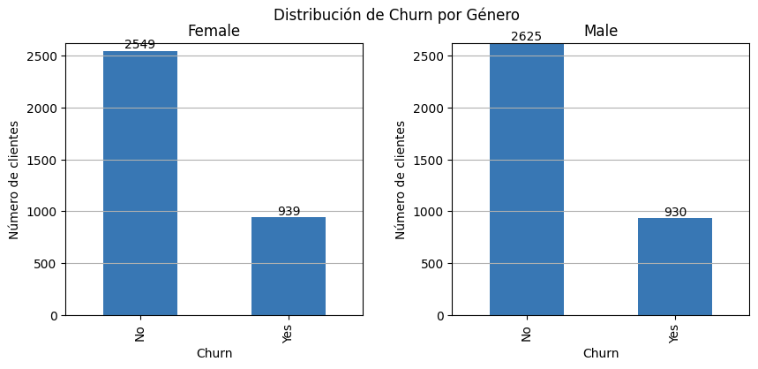

<ul>
<li>
Los clientes con contratos mes a mes presentan una mayor tasa de churn en comparación con contratos de mayor duración.
</li>
</ul>

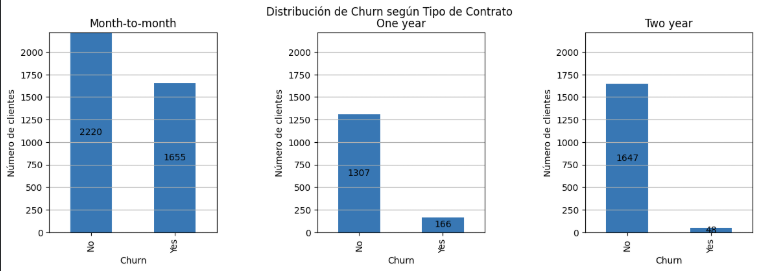

<ul>
<li>
El método de pago “Electronic check” concentra una mayor proporción de clientes que cancelan el servicio.
</li>
</ul>

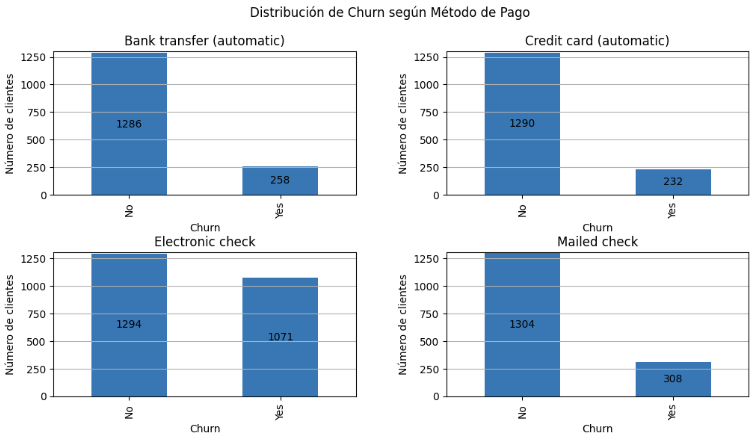

<ul>
<li>
Los clientes que utilizan facturación electrónica (Paperless Billing) muestran una mayor tendencia a la evasión.
</li>
</ul>

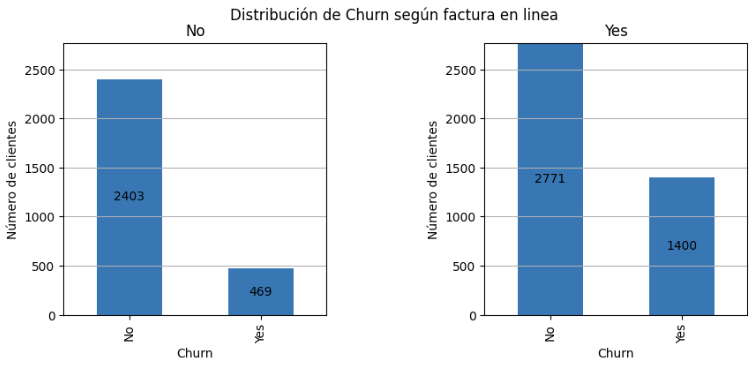

## Variables numéricas

Para las variables numéricas se utilizaron estadísticas descriptivas y boxplots comparativos entre clientes que cancelaron y los que no.

<ul>
<li>
Tenure (tiempo de contrato):
Los clientes que presentan churn tienen un tiempo de permanencia significativamente menor. La evasión ocurre principalmente en los primeros meses.
</li>
</ul>


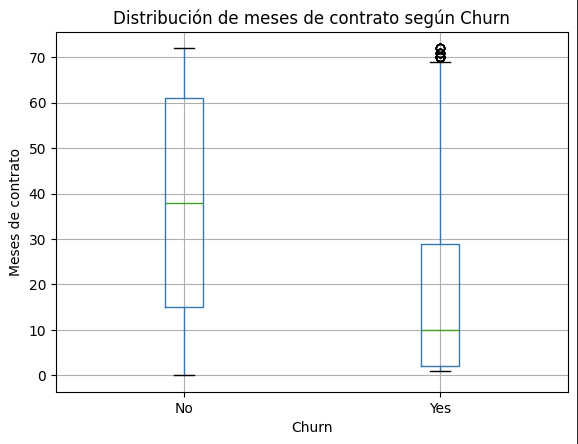

<ul>
<li>
Charges.Monthly y Cuentas_Diarias:
Los clientes que abandonan el servicio suelen tener cargos mensuales y diarios más altos, lo que sugiere una percepción negativa del valor recibido.
</li>
</ul>

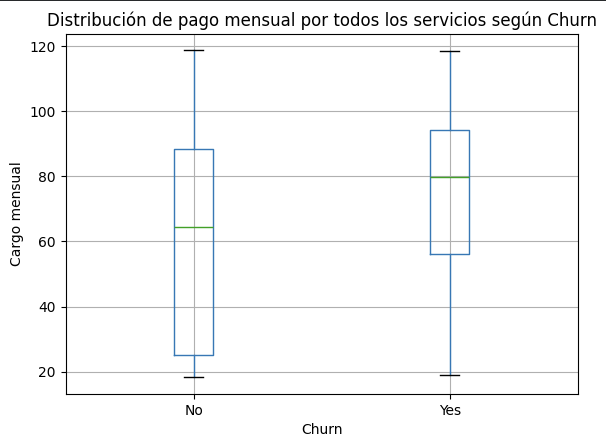

<ul>
<li>
Charges.Total:
Los clientes con churn muestran un gasto acumulado menor, no por pagar menos, sino por abandonar el servicio de manera temprana.
</li>
</ul>

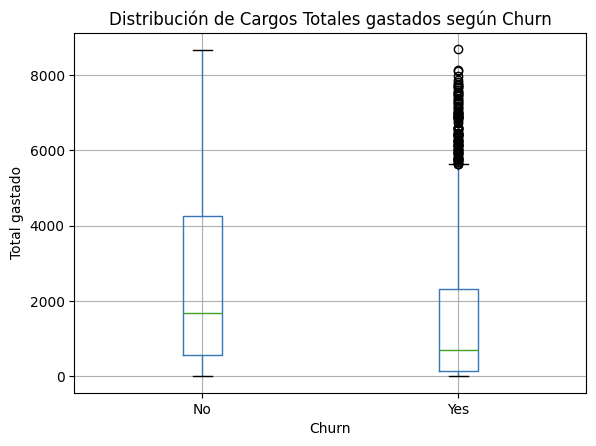

#Conclusiones e Insights
A partir del análisis exploratorio se concluye que la evasión de clientes en Telecom X sigue patrones claros y consistentes:
<ul>
<li>
El churn ocurre principalmente en clientes con bajo tiempo de contrato.
</li>
<li>
Los contratos mes a mes representan el mayor riesgo de cancelación.
</li>
<li>
Un alto costo percibido en poco tiempo está asociado a una mayor probabilidad de evasión.
</li>
<li>
Las variables demográficas, como el género, no influyen de manera significativa.
</li>
<li>
Los servicios online, tal como están actualmente implementados, no están generando un efecto claro de retención, lo que podría indicar problemas en la experiencia del cliente o en el valor percibido.
</li>
</ul>

Estos insights permiten comprender que la evasión está más relacionada con la experiencia inicial y la estructura del servicio, que con características personales del cliente.


# Recomendaciones
Con base en los hallazgos del análisis, se proponen las siguientes recomendaciones estratégicas:
<ul>
<li>
Fortalecer la retención temprana, implementando acciones de seguimiento y acompañamiento durante los primeros meses del contrato.
</li>
<li>
Incentivar contratos de mayor duración, ofreciendo beneficios a los clientes que migren de contratos mes a mes a contratos anuales.
</li>
<li>
Revisar la calidad y propuesta de valor de los servicios online, especialmente en clientes con alto gasto mensual.
</li>
<li>
Promover métodos de pago automáticos, reduciendo la dependencia del método “Electronic check”, asociado a mayor churn.
</li>
<li>
Utilizar los patrones identificados como base para modelos predictivos de churn, que permitan anticipar la evasión y actuar de forma preventiva.
</li>
</ul>